In [1]:
import pandas as pd
import nltk
import re
import string
import os
import sys

In [2]:
#Loading stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [3]:
df = pd.read_csv(os.path.join(r"F:\Kabir\CSUN\R","preprocessed_reddit_comments_2.csv"))

pd.set_option('display.max_colwidth', 100)

In [4]:
df.head()

,POSTNAME,AUTHOR,COMMENT
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.


In [11]:
df.fillna("")

,POSTNAME,AUTHOR,COMMENT
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.
...,...,...,...
3392,What are your long term review on the iphone 15 pro : r/iphone,skyclubaccess,Polarizing reviews how?\r\nIt's a solid phone. The only thing I can think of is people comparing...
3393,What are your long term review on the iphone 15 pro : r/iphone,tdottwooo,"To be real here, I went from a 11pm to a 15pm and can’t really tell a difference"
3394,What are your long term review on the iphone 15 pro : r/iphone,tusi2,Wait six (even three) months after the release of any new model and you'll know what you're buying.
3395,What are your long term review on the iphone 15 pro : r/iphone,valoremz,I came from a 12 Pro so I don’t find much difference day to day honestly.\r\nBut there is someth...


In [16]:
def remove_punctuation(column_data):
    #Replace URL
    column_data = re.sub(r'http\S+', '', column_data)
    column_data = re.sub(r'www\S+', '', column_data)
    #Remove numbers
    column_data = re.sub(r'[0-9]+','', column_data)
    #Remove punctuation
    column_data = "".join([word for word in column_data if word not in string.punctuation])
    column_data = column_data.lower()
    #tokenize
    column_data = re.split("\W+", column_data)
    #remove stopwords
    column_data = [word for word in column_data if word not in stopwords]
    return column_data
    
df['tokenized_text'] = df['COMMENT'].apply(remove_punctuation)

In [17]:
df

,POSTNAME,AUTHOR,COMMENT,tokenized_text
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scares, exactl..."
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid..."
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film...","[saw, last, weekend, decent, better, expected, sydney, good, film, moments, extreme, would, thou..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?,"[talking, like, hereditary, wild, malignant, rails, schlock, wild]"
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.,"[metacritic, score, brutal, early, sxsw, reviews, positive]"
...,...,...,...,...
3392,What are your long term review on the iphone 15 pro : r/iphone,skyclubaccess,Polarizing reviews how?\r\nIt's a solid phone. The only thing I can think of is people comparing...,"[polarizing, reviews, solid, phone, thing, think, people, comparing, pro, pro, concluding, isnt,..."
3393,What are your long term review on the iphone 15 pro : r/iphone,tdottwooo,"To be real here, I went from a 11pm to a 15pm and can’t really tell a difference","[real, went, pm, pm, really, tell, difference]"
3394,What are your long term review on the iphone 15 pro : r/iphone,tusi2,Wait six (even three) months after the release of any new model and you'll know what you're buying.,"[wait, six, even, three, months, release, new, model, youll, know, youre, buying]"
3395,What are your long term review on the iphone 15 pro : r/iphone,valoremz,I came from a 12 Pro so I don’t find much difference day to day honestly.\r\nBut there is someth...,"[came, pro, find, much, difference, day, day, honestly, something, photos, processed, definitely..."


In [23]:

my_lemmatizer = nltk.WordNetLemmatizer()

def lemmatizing_function(column_data):
    column_data = [my_lemmatizer.lemmatize(word) for word in column_data]
    return column_data

df['lemmatized'] = df['tokenized_text'].apply(lemmatizing_function)

df.head()

,POSTNAME,AUTHOR,COMMENT,tokenized_text,rejoined_tokenized_comments,sentiment,lemmatized
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scares, exactl...",oof admittedly lower expected disappointed read film relies cheap jump scares exactly expect hor...,negative,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scare, exactly..."
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid...",scene towards beginning movie feature red flashing light relatively brief easy avoid believe occurs,positive,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid..."
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film...","[saw, last, weekend, decent, better, expected, sydney, good, film, moments, extreme, would, thou...",saw last weekend decent better expected sydney good film moments extreme would thought lots pred...,positive,"[saw, last, weekend, decent, better, expected, sydney, good, film, moment, extreme, would, thoug..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?,"[talking, like, hereditary, wild, malignant, rails, schlock, wild]",talking like hereditary wild malignant rails schlock wild,positive,"[talking, like, hereditary, wild, malignant, rail, schlock, wild]"
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.,"[metacritic, score, brutal, early, sxsw, reviews, positive]",metacritic score brutal early sxsw reviews positive,negative,"[metacritic, score, brutal, early, sxsw, review, positive]"


In [18]:
df.to_csv(os.path.join(r"F:\Kabir\CSUN\R","preprocessed_reddit_comments_python.csv"), index=False)

In [24]:
#Rejoin tokenized words

def joiner(column_data):
    return " ".join(column_data).strip()

df['rejoined_tokenized_comments'] = df['lemmatized'].apply(joiner)

df

,POSTNAME,AUTHOR,COMMENT,tokenized_text,rejoined_tokenized_comments,sentiment,lemmatized
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scares, exactl...",oof admittedly lower expected disappointed read film relies cheap jump scare exactly expect horr...,negative,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scare, exactly..."
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid...",scene towards beginning movie feature red flashing light relatively brief easy avoid believe occurs,positive,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid..."
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film...","[saw, last, weekend, decent, better, expected, sydney, good, film, moments, extreme, would, thou...",saw last weekend decent better expected sydney good film moment extreme would thought lot predic...,positive,"[saw, last, weekend, decent, better, expected, sydney, good, film, moment, extreme, would, thoug..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?,"[talking, like, hereditary, wild, malignant, rails, schlock, wild]",talking like hereditary wild malignant rail schlock wild,positive,"[talking, like, hereditary, wild, malignant, rail, schlock, wild]"
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.,"[metacritic, score, brutal, early, sxsw, reviews, positive]",metacritic score brutal early sxsw review positive,negative,"[metacritic, score, brutal, early, sxsw, review, positive]"
...,...,...,...,...,...,...,...
3392,What are your long term review on the iphone 15 pro : r/iphone,skyclubaccess,Polarizing reviews how?\r\nIt's a solid phone. The only thing I can think of is people comparing...,"[polarizing, reviews, solid, phone, thing, think, people, comparing, pro, pro, concluding, isnt,...",polarizing review solid phone thing think people comparing pro pro concluding isnt worth upgrade...,neutral,"[polarizing, review, solid, phone, thing, think, people, comparing, pro, pro, concluding, isnt, ..."
3393,What are your long term review on the iphone 15 pro : r/iphone,tdottwooo,"To be real here, I went from a 11pm to a 15pm and can’t really tell a difference","[real, went, pm, pm, really, tell, difference]",real went pm pm really tell difference,neutral,"[real, went, pm, pm, really, tell, difference]"
3394,What are your long term review on the iphone 15 pro : r/iphone,tusi2,Wait six (even three) months after the release of any new model and you'll know what you're buying.,"[wait, six, even, three, months, release, new, model, youll, know, youre, buying]",wait six even three month release new model youll know youre buying,neutral,"[wait, six, even, three, month, release, new, model, youll, know, youre, buying]"
3395,What are your long term review on the iphone 15 pro : r/iphone,valoremz,I came from a 12 Pro so I don’t find much difference day to day honestly.\r\nBut there is someth...,"[came, pro, find, much, difference, day, day, honestly, something, photos, processed, definitely...",came pro find much difference day day honestly something photo processed definitely software thi...,positive,"[came, pro, find, much, difference, day, day, honestly, something, photo, processed, definitely,..."


In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download Vader resources
nltk.download('vader_lexicon')

# Initialize Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get overall sentiment
def get_overall_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


# Apply overall sentiment analysis on each row
df['sentiment'] = df['rejoined_tokenized_comments'].apply(lambda x: get_overall_sentiment(x))

df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\isha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,POSTNAME,AUTHOR,COMMENT,tokenized_text,rejoined_tokenized_comments,sentiment,lemmatized
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scares, exactl...",oof admittedly lower expected disappointed read film relies cheap jump scare exactly expect horr...,negative,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scare, exactly..."
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid...",scene towards beginning movie feature red flashing light relatively brief easy avoid believe occurs,positive,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid..."
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film...","[saw, last, weekend, decent, better, expected, sydney, good, film, moments, extreme, would, thou...",saw last weekend decent better expected sydney good film moment extreme would thought lot predic...,positive,"[saw, last, weekend, decent, better, expected, sydney, good, film, moment, extreme, would, thoug..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?,"[talking, like, hereditary, wild, malignant, rails, schlock, wild]",talking like hereditary wild malignant rail schlock wild,positive,"[talking, like, hereditary, wild, malignant, rail, schlock, wild]"
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.,"[metacritic, score, brutal, early, sxsw, reviews, positive]",metacritic score brutal early sxsw review positive,negative,"[metacritic, score, brutal, early, sxsw, review, positive]"
...,...,...,...,...,...,...,...
3392,What are your long term review on the iphone 15 pro : r/iphone,skyclubaccess,Polarizing reviews how?\r\nIt's a solid phone. The only thing I can think of is people comparing...,"[polarizing, reviews, solid, phone, thing, think, people, comparing, pro, pro, concluding, isnt,...",polarizing review solid phone thing think people comparing pro pro concluding isnt worth upgrade...,neutral,"[polarizing, review, solid, phone, thing, think, people, comparing, pro, pro, concluding, isnt, ..."
3393,What are your long term review on the iphone 15 pro : r/iphone,tdottwooo,"To be real here, I went from a 11pm to a 15pm and can’t really tell a difference","[real, went, pm, pm, really, tell, difference]",real went pm pm really tell difference,neutral,"[real, went, pm, pm, really, tell, difference]"
3394,What are your long term review on the iphone 15 pro : r/iphone,tusi2,Wait six (even three) months after the release of any new model and you'll know what you're buying.,"[wait, six, even, three, months, release, new, model, youll, know, youre, buying]",wait six even three month release new model youll know youre buying,neutral,"[wait, six, even, three, month, release, new, model, youll, know, youre, buying]"
3395,What are your long term review on the iphone 15 pro : r/iphone,valoremz,I came from a 12 Pro so I don’t find much difference day to day honestly.\r\nBut there is someth...,"[came, pro, find, much, difference, day, day, honestly, something, photos, processed, definitely...",came pro find much difference day day honestly something photo processed definitely software thi...,positive,"[came, pro, find, much, difference, day, day, honestly, something, photo, processed, definitely,..."


In [27]:
# Feature to calculate the length of each message.

df['message_length'] = df['COMMENT'].apply(lambda x: len(x) - x.count(" "))
df.head()

,POSTNAME,AUTHOR,COMMENT,tokenized_text,rejoined_tokenized_comments,sentiment,lemmatized,message_length
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scares, exactl...",oof admittedly lower expected disappointed read film relies cheap jump scare exactly expect horr...,negative,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scare, exactly...",207
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid...",scene towards beginning movie feature red flashing light relatively brief easy avoid believe occurs,positive,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid...",148
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film...","[saw, last, weekend, decent, better, expected, sydney, good, film, moments, extreme, would, thou...",saw last weekend decent better expected sydney good film moment extreme would thought lot predic...,positive,"[saw, last, weekend, decent, better, expected, sydney, good, film, moment, extreme, would, thoug...",398
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?,"[talking, like, hereditary, wild, malignant, rails, schlock, wild]",talking like hereditary wild malignant rail schlock wild,positive,"[talking, like, hereditary, wild, malignant, rail, schlock, wild]",62
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.,"[metacritic, score, brutal, early, sxsw, reviews, positive]",metacritic score brutal early sxsw review positive,negative,"[metacritic, score, brutal, early, sxsw, review, positive]",67


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#Label Encoding
from sklearn import preprocessing


In [32]:
le = preprocessing.LabelEncoder()

label_dict = {}



df['sentiment']=le.fit_transform(df['sentiment'])

#label_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

<Axes: >

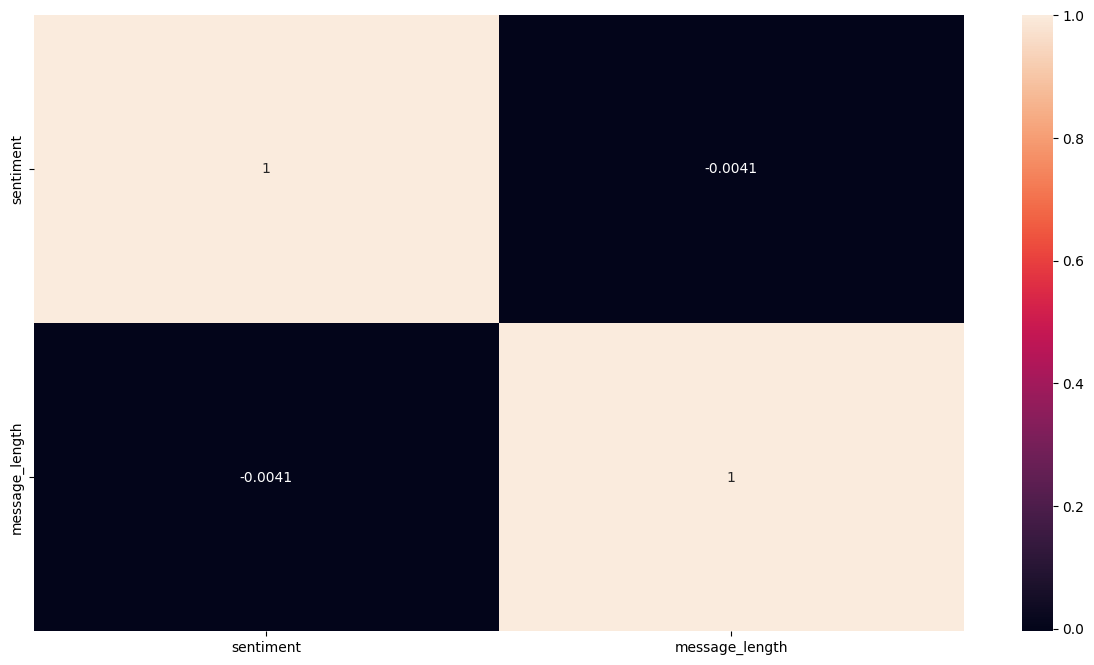

In [33]:
#Finding correlation for numeric data
#list 1
corr = df[['sentiment', 'message_length']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

In [34]:
del(df['message_length'])

In [37]:
df.head()

,POSTNAME,AUTHOR,COMMENT,tokenized_text,rejoined_tokenized_comments,sentiment,lemmatized
0,'Immaculate' Review Thread : r/boxoffice,Daydream_machine,Oof that’s admittedly lower than I expected. Disappointed to read that the film relies on cheap ...,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scares, exactl...",oof admittedly lower expected disappointed read film relies cheap jump scare exactly expect horr...,negative,"[oof, admittedly, lower, expected, disappointed, read, film, relies, cheap, jump, scare, exactly..."
1,'Immaculate' Review Thread : r/boxoffice,Interesting_Tie_1870,There is a scene towards the beginning of the movie that does feature a red flashing light. It’s...,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid...",scene towards beginning movie feature red flashing light relatively brief easy avoid believe occurs,positive,"[scene, towards, beginning, movie, feature, red, flashing, light, relatively, brief, easy, avoid..."
2,'Immaculate' Review Thread : r/boxoffice,MrTeapott,"Saw it last weekend.\r\nIt's decent, better than I expected it to be. Sydney is good in the film...","[saw, last, weekend, decent, better, expected, sydney, good, film, moments, extreme, would, thou...",saw last weekend decent better expected sydney good film moment extreme would thought lot predic...,positive,"[saw, last, weekend, decent, better, expected, sydney, good, film, moment, extreme, would, thoug..."
3,'Immaculate' Review Thread : r/boxoffice,OKC2023champs,We talking like hereditary wild? Or malignant off the rails schlock wild?,"[talking, like, hereditary, wild, malignant, rails, schlock, wild]",talking like hereditary wild malignant rail schlock wild,positive,"[talking, like, hereditary, wild, malignant, rail, schlock, wild]"
4,'Immaculate' Review Thread : r/boxoffice,Paddy2015,That metacritic score is brutal and the early SXSW reviews were so positive too.,"[metacritic, score, brutal, early, sxsw, reviews, positive]",metacritic score brutal early sxsw review positive,negative,"[metacritic, score, brutal, early, sxsw, review, positive]"


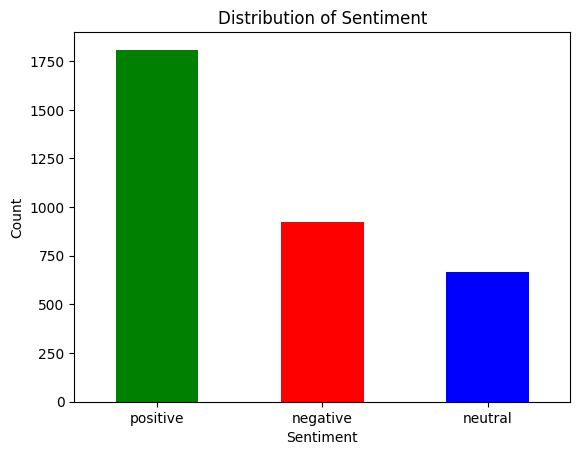

In [42]:
import matplotlib.pyplot as plt
def plotter(INPUT_DF = df):
    # Assuming 'df' is your DataFrame containing the 'sentiment' column
    sentiment_distribution = df['sentiment'].value_counts()

    # Plot the distribution
    sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title('Distribution of Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.show()
plotter(df)

In [40]:
print(sentiment_distribution)

sentiment
positive    1809
negative     922
neutral      666
Name: count, dtype: int64


In [44]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the 'sentiment' column
#Not working
# Separate the data into different sentiment categories
positive_sentiment = df[df['sentiment'] == 'positive']
negative_sentiment = df[df['sentiment'] == 'negative']
neutral_sentiment = df[df['sentiment'] == 'neutral']

# Determine the size of the smallest category
min_samples = min(len(positive_sentiment), len(negative_sentiment), len(neutral_sentiment))

# Resample each category to have the same number of samples
balanced_positive = resample(positive_sentiment, replace=True, n_samples=min_samples, random_state=42)
balanced_negative = resample(negative_sentiment, replace=True, n_samples=min_samples, random_state=42)
balanced_neutral = resample(neutral_sentiment, replace=True, n_samples=min_samples, random_state=42)

# Concatenate the balanced dataframes
balanced_df = pd.concat([balanced_positive.head(min_samples), 
                         balanced_negative.head(min_samples), 
                         balanced_neutral.head(min_samples)])

# Shuffle the dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now 'balanced_df' contains a balanced distribution of samples for model training
balanced_df

,POSTNAME,AUTHOR,COMMENT,tokenized_text,rejoined_tokenized_comments,sentiment,lemmatized
0,Should Billionaires pay more taxes? : r/FluentInFinance,EnIdiot,"The social security cap needs to go, yes. Other taxes need to be reviewed. If your primary incom...","[social, security, cap, needs, go, yes, taxes, need, reviewed, primary, income, capital, gains, ...",social security cap need go yes tax need reviewed primary income capital gain taxed income middl...,positive,"[social, security, cap, need, go, yes, tax, need, reviewed, primary, income, capital, gain, taxe..."
1,Should gyms ban filming?? : r/NoStupidQuestions,AbbeyCats,Yes. 100%,"[yes, ]",yes,positive,"[yes, ]"
2,Should gyms ban filming?? : r/NoStupidQuestions,MasterIntegrator,Yes,[yes],yes,positive,[yes]
3,Should Billionaires pay more taxes? : r/FluentInFinance,Longjumping-Gift6727,Billionaires should not even exist in the world\r\nThere should be a thousand times more billion...,"[billionaires, even, exist, world, thousand, times, billionaires, willing, double, triple, taxes...",billionaire even exist world thousand time billionaire willing double triple tax yeah didnt thin...,positive,"[billionaire, even, exist, world, thousand, time, billionaire, willing, double, triple, tax, yea..."
4,Dutch Breakfast Review : r/2westerneurope4u,InnocentGirl2005,"Thought it was Danish first, those weirdos eat chocolate on sandwiches too.","[thought, danish, first, weirdos, eat, chocolate, sandwiches]",thought danish first weirdo eat chocolate sandwich,negative,"[thought, danish, first, weirdo, eat, chocolate, sandwich]"
...,...,...,...,...,...,...,...
1993,Should gyms ban filming?? : r/NoStupidQuestions,SimpleLittleMan,"No, it’s a public space. Plus people should be able to film themselves to change their form or j...","[public, space, plus, people, able, film, change, form, record, workouts, though, people, dicks,...",public space plus people able film change form record workout though people dick people walking ...,negative,"[public, space, plus, people, able, film, change, form, record, workout, though, people, dick, p..."
1994,Madame Web - Review Thread : r/movies,Hotstuff5991,Sony still makes superhero movies like it's the mid 2000s. Whoever running things over there is ...,"[sony, still, makes, superhero, movies, like, mid, whoever, running, things, touch, needs, fired]",sony still make superhero movie like mid whoever running thing touch need fired,negative,"[sony, still, make, superhero, movie, like, mid, whoever, running, thing, touch, need, fired]"
1995,Dragon's Dogma 2 - Review Thread : r/Games,Krypt0night,There's a review that states the performance and frame dips were so bad on PS5 that it was makin...,"[theres, review, states, performance, frame, dips, bad, ps, making, sick, moved, pc, rest, review]",there review state performance frame dip bad p making sick moved pc rest review,negative,"[there, review, state, performance, frame, dip, bad, p, making, sick, moved, pc, rest, review]"
1996,Should gyms ban filming?? : r/NoStupidQuestions,Steponmy92,"Most do, it's just not enforced",[enforced],enforced,neutral,[enforced]


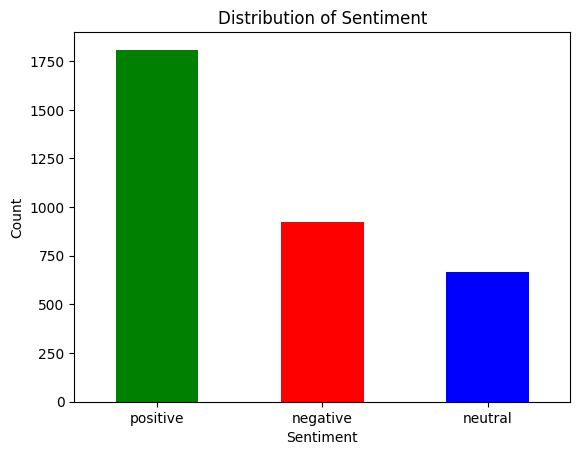

In [45]:
plotter(balanced_df)

In [58]:
column_list = list(df.columns)
column_list.remove('tokenized_text')

X = df[column_list]
y = df['sentiment']
column_list

['POSTNAME',
 'AUTHOR',
 'COMMENT',
 'rejoined_tokenized_comments',
 'sentiment',
 'lemmatized']

In [59]:
df[column_list].to_csv(os.path.join(r"F:\Kabir\CSUN\R","preprocessed_reddit_comments_python_final.csv"), index=False)